In [ ]:
# default_exp core

# module name here
> API details.

In [ ]:
#!pip install git+https://github.com/fastai/fastai2 
#!pip install git+https://github.com/fastai/fastcore
#!python -m pip install git+https://github.com/fastai/fastai.git

In [ ]:
#hide
from fastai2.torch_basics import *
from fastcore.test import *
from nbdev.showdoc import *

In [ ]:
#export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [ ]:
say_hello("Pirata")

'Hello Pirata!'

In [ ]:
assert say_hello("Jeremy")=="Hello Jeremy!"

In [ ]:
#export
class HelloSayer:
    "Say hello to `to` using `say_hello`"
    def __init__(self, to): self.to = to

    def say(self):
        "Do the saying"
        return say_hello(self.to)

In [ ]:
show_doc(HelloSayer.say)

<h4 id="HelloSayer.say" class="doc_header"><code>HelloSayer.say</code><a href="__main__.py#L6" class="source_link" style="float:right">[source]</a></h4>

> <code>HelloSayer.say</code>()

Do the saying

Example

In [ ]:
o = HelloSayer("Alexis")
o.say()

'Hello Alexis!'

Notebooks con funciones:

https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook4_functions/py_exploratory_comp_4_sol.ipynb

https://nbviewer.jupyter.org/github/ClickSecurity/data_hacking/blob/master/dga_detection/DGA_Domain_Detection.ipynb
    
https://nbviewer.jupyter.org/github/amplab/datascience-sp14/blob/master/hw2/HW2.ipynb

https://nbviewer.jupyter.org/gist/twiecki/3962843



In [ ]:
#export
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

print(func(3))

0.049787068367863944


In [ ]:
show_doc(func)

<h4 id="func" class="doc_header"><code>func</code><a href="__main__.py#L1" class="source_link" style="float:right">[source]</a></h4>

> <code>func</code>(**`x`**)



In [ ]:
#hide
import pandas as pd

DATA_PATH = "hw2data" # Make this the /path/to/the/data

In [ ]:
#export
def parse_artists_tags(filename):
    df = pd.read_csv(filename, sep="|", names=["ArtistID", "ArtistName", "Tag", "Count"])
    return df

In [ ]:
#export
def parse_user_artists_matrix(filename):
    df = pd.read_csv(filename)
    return df

In [ ]:
artists_tags = parse_artists_tags(DATA_PATH + "/artists-tags.txt")
user_art_mat = parse_user_artists_matrix(DATA_PATH + "/userart-mat-training.csv")

Number of tags 0
Number of artists 0


In [ ]:
print ("Number of tags %d" % 0) # Change this line. Should be 952803
print ("Number of artists %d" % 0) # Change this line. Should be 17119
artists_tags.Tag.count()
artists_tags.ArtistID.nunique()

20907

In [ ]:
artists_tags.head()

,ArtistID,ArtistName,Tag,Count
0,000077f7-26b1-4710-80cc-f6beddbdd157,Ryan Adams and The Cardinals,I love you baby can I have some more,1
1,000077f7-26b1-4710-80cc-f6beddbdd157,Ryan Adams and The Cardinals,alt country,2
2,000077f7-26b1-4710-80cc-f6beddbdd157,Ryan Adams and The Cardinals,whoa,1
3,00034ede-a1f1-4219-be39-02f36853373e,O Rappa,Artist,1
4,00034ede-a1f1-4219-be39-02f36853373e,O Rappa,Black,1


In [ ]:
import statsmodels.api as sm
import pandas as pd
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [ ]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head()

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
Name: SUNACTIVITY, dtype: float64

In [ ]:
print (df['SUNACTIVITY'].describe())

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64


<AxesSubplot:xlabel='YEAR'>

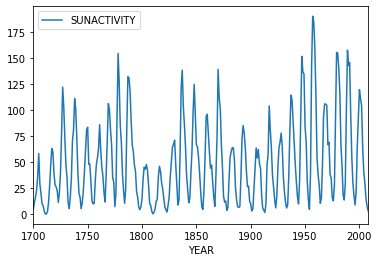

In [ ]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

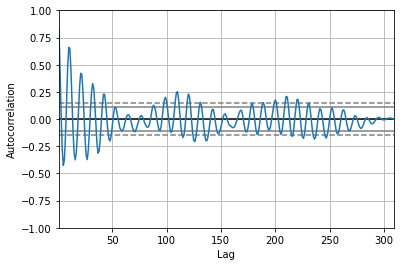

In [ ]:
pd.plotting.autocorrelation_plot(df['SUNACTIVITY'])

In [ ]:
import numpy as np
N2 = int((df.shape[0]-1) / 2)
N2

154

In [ ]:
freqs = np.linspace(0, 0.5, num = N2, endpoint=False)[1:] #Nyquist range

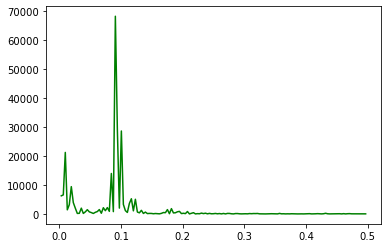

In [ ]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [ ]:
freq_index_at_max_power = np.argmax(periodogram)
print ('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


In [ ]:
v_data = df['SUNACTIVITY'].max() - df['SUNACTIVITY'].min()
h_data = df['YEAR'].max() - df['YEAR'].min()
v_data_diffs = df['SUNACTIVITY'].diff().apply(np.abs)
vbar_data_diffs = v_data_diffs / v_data    
h_data_diffs = df['YEAR'].diff().apply(np.abs)
hbar_data_diffs = h_data_diffs / h_data

In [ ]:
#export
def objective_fcn(width_height, target):
    dev = setup_device_coords(figsize=width_height)
    lengths = segment_lengths(dev['aspect ratio'], dev['horizontal_device'])
    weighted_avg_banking =  np.sum(segment_orientations(dev['aspect ratio']) * lengths) / np.sum(lengths)  
    return np.abs(weighted_avg_banking - target)

In [ ]:
show_doc(objective_fcn)

<h4 id="objective_fcn" class="doc_header"><code>objective_fcn</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>objective_fcn</code>(**`width_height`**, **`target`**)



In [ ]:
#export
def setup_device_coords(figsize=(8,6)):
    h_device, v_device = figsize
    fig, ax = plot_sunspots(figsize)
    device_coords = [ax.transData.transform(data_coords) for data_coords in df.values]
    df_device = pd.DataFrame(device_coords, columns=['YEAR', 'SUNACTIVITY'])    
    v_device = df_device['SUNACTIVITY'].max() - df_device['SUNACTIVITY'].min()
    h_device = df_device['YEAR'].max() - df_device['YEAR'].min()
    aspect_ratio = v_device / h_device
    v_conversion = v_device / v_data  
    h_conversion = h_device / h_data
    fig.clear()
    return {'aspect ratio': aspect_ratio,
            'vertical_device': v_device,
            'horizontal_device': h_device,
            'vertical conversion': v_conversion,
            'horizontal conversion': h_conversion}

In [ ]:
#export
def plot_sunspots(figsize, color='blue'):
    fig = plt.figure(figsize=figsize)
    fig.canvas.set_window_title('%.1f by %.1f inch window' % (figsize[0], figsize[1]))
    ax1 = fig.add_subplot(111)
    df.plot(x='YEAR', y='SUNACTIVITY', ax=ax1, linewidth=2, color=color)
    fig.tight_layout()
    ax1.set_xlim(right=df['YEAR'].max())
    ax1.set_ylim(top=df['SUNACTIVITY'].max())
    ax1.set_ylabel('Observed Sunspots')
    ax1.set_title('Sunspot Activity Over Time')
    return (fig, ax1)

In [ ]:
#export
def segment_lengths(aspect_ratio, h_device):
    return h_device * np.sqrt(hbar_data_diffs.dropna()**2 + aspect_ratio**2 * vbar_data_diffs.dropna()**2)

In [ ]:
#export
def segment_orientations(aspect_ratio):
    return np.arctan(aspect_ratio * vbar_data_diffs / hbar_data_diffs)

In [ ]:
#hide
import scipy.optimize as spo
target = np.radians(45)   
slice_obj = np.s_[20:26:0.5, # widths
                  1:4:0.5]   # heights              
results = spo.brute(objective_fcn, slice_obj, args=[target], full_output=True, finish=None)
optimal_dims, objective_val, search_grid, objective_grid = results

<ipython-input-84-c97eae451caa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 1440x72 with 0 Axes>

<Figure size 1440x108 with 0 Axes>

<Figure size 1440x144 with 0 Axes>

<Figure size 1440x180 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x252 with 0 Axes>

<Figure size 1476x72 with 0 Axes>

<Figure size 1476x108 with 0 Axes>

<Figure size 1476x144 with 0 Axes>

<Figure size 1476x180 with 0 Axes>

<Figure size 1476x216 with 0 Axes>

<Figure size 1476x252 with 0 Axes>

<Figure size 1512x72 with 0 Axes>

<Figure size 1512x108 with 0 Axes>

<Figure size 1512x144 with 0 Axes>

<Figure size 1512x180 with 0 Axes>

<Figure size 1512x216 with 0 Axes>

<Figure size 1512x252 with 0 Axes>

<Figure size 1548x72 with 0 Axes>

<Figure size 1548x108 with 0 Axes>

<Figure size 1548x144 with 0 Axes>

<Figure size 1548x180 with 0 Axes>

<Figure size 1548x216 with 0 Axes>

<Figure size 1548x252 with 0 Axes>

<Figure size 1584x72 with 0 Axes>

<Figure size 1584x108 with 0 Axes>

<Figure size 1584x144 with 0 Axes>

<Figure size 1584x180 with 0 Axes>

<Figure size 1584x216 with 0 Axes>

<Figure size 1584x252 with 0 Axes>

<Figure size 1620x72 with 0 Axes>

<Figure size 1620x108 with 0 Axes>

<Figure size 1620x144 with 0 Axes>

<Figure size 1620x180 with 0 Axes>

<Figure size 1620x216 with 0 Axes>

<Figure size 1620x252 with 0 Axes>

<Figure size 1656x72 with 0 Axes>

<Figure size 1656x108 with 0 Axes>

<Figure size 1656x144 with 0 Axes>

<Figure size 1656x180 with 0 Axes>

<Figure size 1656x216 with 0 Axes>

<Figure size 1656x252 with 0 Axes>

<Figure size 1692x72 with 0 Axes>

<Figure size 1692x108 with 0 Axes>

<Figure size 1692x144 with 0 Axes>

<Figure size 1692x180 with 0 Axes>

<Figure size 1692x216 with 0 Axes>

<Figure size 1692x252 with 0 Axes>

<Figure size 1728x72 with 0 Axes>

<Figure size 1728x108 with 0 Axes>

<Figure size 1728x144 with 0 Axes>

<Figure size 1728x180 with 0 Axes>

<Figure size 1728x216 with 0 Axes>

<Figure size 1728x252 with 0 Axes>

<Figure size 1764x72 with 0 Axes>

<Figure size 1764x108 with 0 Axes>

<Figure size 1764x144 with 0 Axes>

<Figure size 1764x180 with 0 Axes>

<Figure size 1764x216 with 0 Axes>

<Figure size 1764x252 with 0 Axes>

<Figure size 1800x72 with 0 Axes>

<Figure size 1800x108 with 0 Axes>

<Figure size 1800x144 with 0 Axes>

<Figure size 1800x180 with 0 Axes>

<Figure size 1800x216 with 0 Axes>

<Figure size 1800x252 with 0 Axes>

<Figure size 1836x72 with 0 Axes>

<Figure size 1836x108 with 0 Axes>

<Figure size 1836x144 with 0 Axes>

<Figure size 1836x180 with 0 Axes>

<Figure size 1836x216 with 0 Axes>

<Figure size 1836x252 with 0 Axes>



Weighted-average banking using default 8 x 6 inch plot window: 87.3 degrees (goal is 45 degrees)


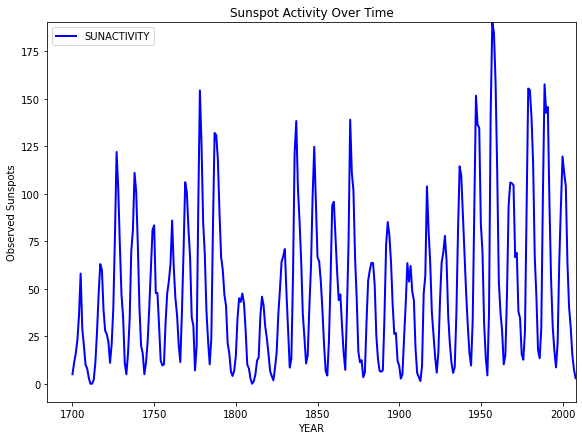

In [ ]:
plt.close('all')
ax1 = plot_sunspots((8,6))
print ('\n\nWeighted-average banking using default 8 x 6 inch plot window: 87.3 degrees (goal is 45 degrees)')



Optimal width and height found to be 23.0 by 1.5 inches
Average banking interval at optimized aspect ratio: (44.77, 45.23)


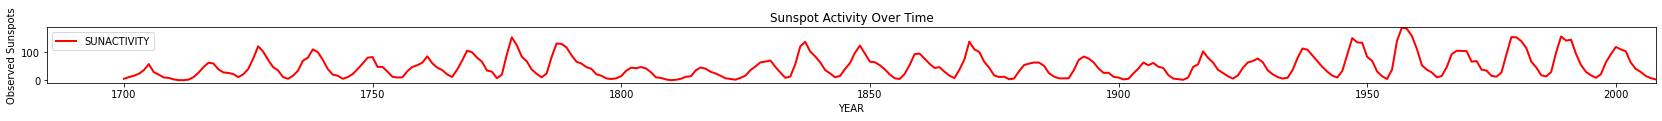

In [ ]:
ax2 = plot_sunspots(optimal_dims, color='red')
print ('\n\nOptimal width and height found to be %.1f by %.1f inches' % (optimal_dims[0], optimal_dims[1]))
banking = [np.degrees(target - objective_val),
           np.degrees(target + objective_val)]    
print ('Average banking interval at optimized aspect ratio: (%.2f, %.2f)' % (banking[0], banking[1]))